In [1]:
import numpy as np
import pandas as pd
from six.moves import zip
from os import listdir

from bokeh.plotting import figure, show, output_notebook

output_notebook()

Loading BokehJS ...

In [2]:
N = 4000

x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5

In [3]:

TOOLS="hover,crosshair,pan,wheel_zoom,box_zoom,reset,tap,save,box_select,poly_select,lasso_select"

colors2 = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)]
p1 = figure(width=300, height=300, tools=TOOLS)
p1.scatter(x,y, radius=radii, fill_color=colors2, fill_alpha=0.6, line_color=None)

colors2 = ["#%02x%02x%02x" % (150, int(g), int(b)) for g, b in zip(50+2*x, 30+2*y)]
p2 = figure(width=300, height=300, tools=TOOLS)
p2.scatter(x,y, radius=radii, fill_color=colors2, fill_alpha=0.6, line_color=None)

In [4]:
show(p1)
show(p2)


Find all the log files in the log directory

In [99]:
files = listdir('logs')
log_files = []
for file in files:
    if file.endswith('.log'):
        log_files.append(file)
    else:
        print('FYI - Non log file detected and ignored in data folder - ', file)
print('Succesfully identified', len(log_files), 'log file(s)')
    

Succesfully identified 4 log file(s)


Import the log files into a list of lists 

In [100]:
raw_log_import_list = []
ignored_lines = []
for log_file_name in log_files:
    raw_file = open('logs\\' + str(log_file_name))
    raw_log_import_list.append(raw_file)
file_data_table = []
for raw_file in raw_log_import_list:
    file_line = raw_file.readline()
    while file_line:
        try:
            date = file_line[0:10]
            time = file_line[11:23]
            event = file_line.split('Event(')[1][0:5].split('-')[0]
            log_event_detail = file_line[73:].split('{')[1][:-4].split(', \'')
            file_data_table.append((raw_file,date,time,event,log_event_detail))
        except:
            ignored_lines.append((raw_file,file_line))
        file_line = raw_file.readline()
raw_file.close()
        

In [101]:
len(file_data_table)

1603

for the hit events, take the next  ratings and append them (you append in history, as that is the most current, not exactly sure hwo I should do that right now

try next line and if it's rating then refresh, else assume old ratings are current (but include a timestamp on them)')

In [112]:
cols = ['file', 'date', 'time', 'event', 
        'pos_x', 'pos_y', 'relative_loc_x', 'relative_loc_y', 
        'hit_conf', 'reward_conf', 'player_skill']
df = pd.DataFrame(columns = cols)
tmp_table = []
hit_conf = False
reward_conf = False
player_skill = False
count = 0
for line in file_data_table:
    file = line[0]
    date = line[1]
    time = line[2]
    event = line[3]
    if event in ['9.1','9.2','9.3', '9.4']:
        details = line[4][0].split(',\'')
        pos = details[0].split('(')[1].split(')')[0]
        pos_x = pos.split(',')[0]
        pos_y = pos.split(',')[1]
        distance = details[1].split(' ')[1]
        relative_loc = details[2].split('(')[1].split(')')[0]
        relative_loc_x = relative_loc.split(',')[0]
        relative_loc_y = relative_loc.split(', ')[1]
        entry = [file, date, time, event, pos_x, pos_y, relative_loc_x, relative_loc_y, None, None, None]
        tmp_table.append(entry)
    if event == '7':
        line_relevant = line[4][0]
        if 'hit_conf' in line_relevant:
            hit_conf = line_relevant[-2:-1]
        elif 'reward_conf' in line_relevant:
            reward_conf = line_relevant[-2:-1]
        elif 'player_skill' in line_relevant:
            player_skill = line_relevant[-2:-1]
    if player_skill:
        df_tmp = pd.DataFrame(tmp_table, columns = cols)
        df_tmp['hit_conf'] = hit_conf
        df_tmp['reward_conf'] = reward_conf
        df_tmp['player_skill'] = player_skill
        df = df.append(df_tmp)
        hit_conf = False
        reward_conf = False
        player_skill = False
        tmp_table = []
        
        
df['pos_x'] = df['pos_x'].astype('float')
df['pos_y'] = df['pos_y'].astype('float')
df['relative_loc_x'] = df['relative_loc_x'].astype('float')
df['relative_loc_y'] = df['relative_loc_y'].astype('float')
df['hit_conf'] = df['hit_conf'].astype('float')
df['reward_conf'] = df['reward_conf'].astype('float')
df['player_skill'] = df['player_skill'].astype('float')

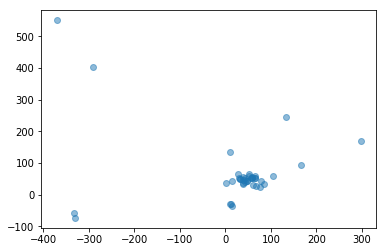

In [114]:
import numpy as np
import matplotlib.pyplot as plt

x = df['relative_loc_x']
y = df['relative_loc_y']

plt.scatter(x, y, alpha=0.5)
plt.show()